In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
#System
import os
import sys
import traceback
#Random
import random

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,ElasticNet

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("indianEco.csv")

In [5]:
 dataset.head()

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


In [6]:
 dataset.head(10)

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
5,1965,India,5.955485e+10,119,-2.64,5.21,3.31,6.008509e+08,9.47,500114346,2.26,44.20
6,1966,India,4.586546e+10,90,-0.06,6.67,4.14,6.096946e+08,10.80,510992617,2.18,44.84
7,1967,India,5.013494e+10,96,7.83,5.95,4.03,6.637641e+08,13.06,521987069,2.15,45.47
8,1968,India,5.308546e+10,100,3.39,4.94,4.04,7.303527e+08,3.24,533431909,2.19,46.10
9,1969,India,5.844800e+10,108,6.54,4.03,3.71,9.277641e+08,-0.58,545314670,2.23,46.75


In [7]:
dataset.describe()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
count,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000
mean,1990.000000,6.584725e+11,575.557377,4.938197,12.746393,10.885574,9.802227e+10,7.413279,8.913946e+08,1.927705,57.146230
std,17.752934,8.129606e+11,584.079062,3.344891,8.155110,7.060458,1.497102e+11,4.940153,2.974496e+08,0.419024,8.459559
min,1960.000000,3.702988e+10,82.000000,-7.250000,3.710000,3.310000,4.991451e+08,-7.630000,4.459546e+08,0.960000,41.130000
25%,1975.000000,9.952590e+10,161.000000,3.720000,6.590000,5.200000,2.324650e+09,4.010000,6.235242e+08,1.620000,50.630000
50%,1990.000000,2.882084e+11,340.000000,5.530000,8.570000,7.050000,1.151174e+10,6.670000,8.704522e+08,2.150000,57.660000
75%,2005.000000,8.203816e+11,715.000000,7.450000,19.640000,18.690000,1.378248e+11,10.020000,1.154639e+09,2.260000,64.310000
max,2020.000000,2.831552e+12,2101.000000,9.630000,31.260000,25.430000,5.902274e+11,28.600000,1.396387e+09,2.340000,69.730000


In [8]:
dataset.corr()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,1.000000,0.846589,0.865053,0.278268,0.873956,0.909573,0.814619,-0.037177,0.997523,-0.907750,0.995487
GDP (current US$),0.846589,1.000000,0.998605,0.119174,0.835933,0.847781,0.980297,-0.105585,0.863530,-0.957492,0.803927
GDP per capita (current US$),0.865053,0.998605,1.000000,0.142764,0.853837,0.863811,0.977189,-0.091981,0.880301,-0.959680,0.825702
GDP growth (annual %),0.278268,0.119174,0.142764,1.000000,0.280289,0.269356,0.049946,0.007843,0.276103,-0.168449,0.294472
Imports of goods and services (% of GDP),0.873956,0.835933,0.853837,0.280289,1.000000,0.989499,0.841084,-0.034099,0.894541,-0.912249,0.849597
Exports of goods and services (% of GDP),0.909573,0.847781,0.863811,0.269356,0.989499,1.000000,0.851635,-0.073604,0.927934,-0.935063,0.886921
"Total reserves (includes gold, current US$)",0.814619,0.980297,0.977189,0.049946,0.841084,0.851635,1.000000,-0.107925,0.835249,-0.957013,0.767909
"Inflation, consumer prices (annual %)",-0.037177,-0.105585,-0.091981,0.007843,-0.034099,-0.073604,-0.107925,1.000000,-0.053939,0.123497,-0.014927
"Population, total",0.997523,0.863530,0.880301,0.276103,0.894541,0.927934,0.835249,-0.053939,1.000000,-0.928431,0.987134
Population growth (annual %),-0.907750,-0.957492,-0.959680,-0.168449,-0.912249,-0.935063,-0.957013,0.123497,-0.928431,1.000000,-0.868766


In [9]:
print(dataset.columns)

Index(['Year', 'Country Name', 'GDP (current US$) ',
       ' GDP per capita (current US$) ', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')


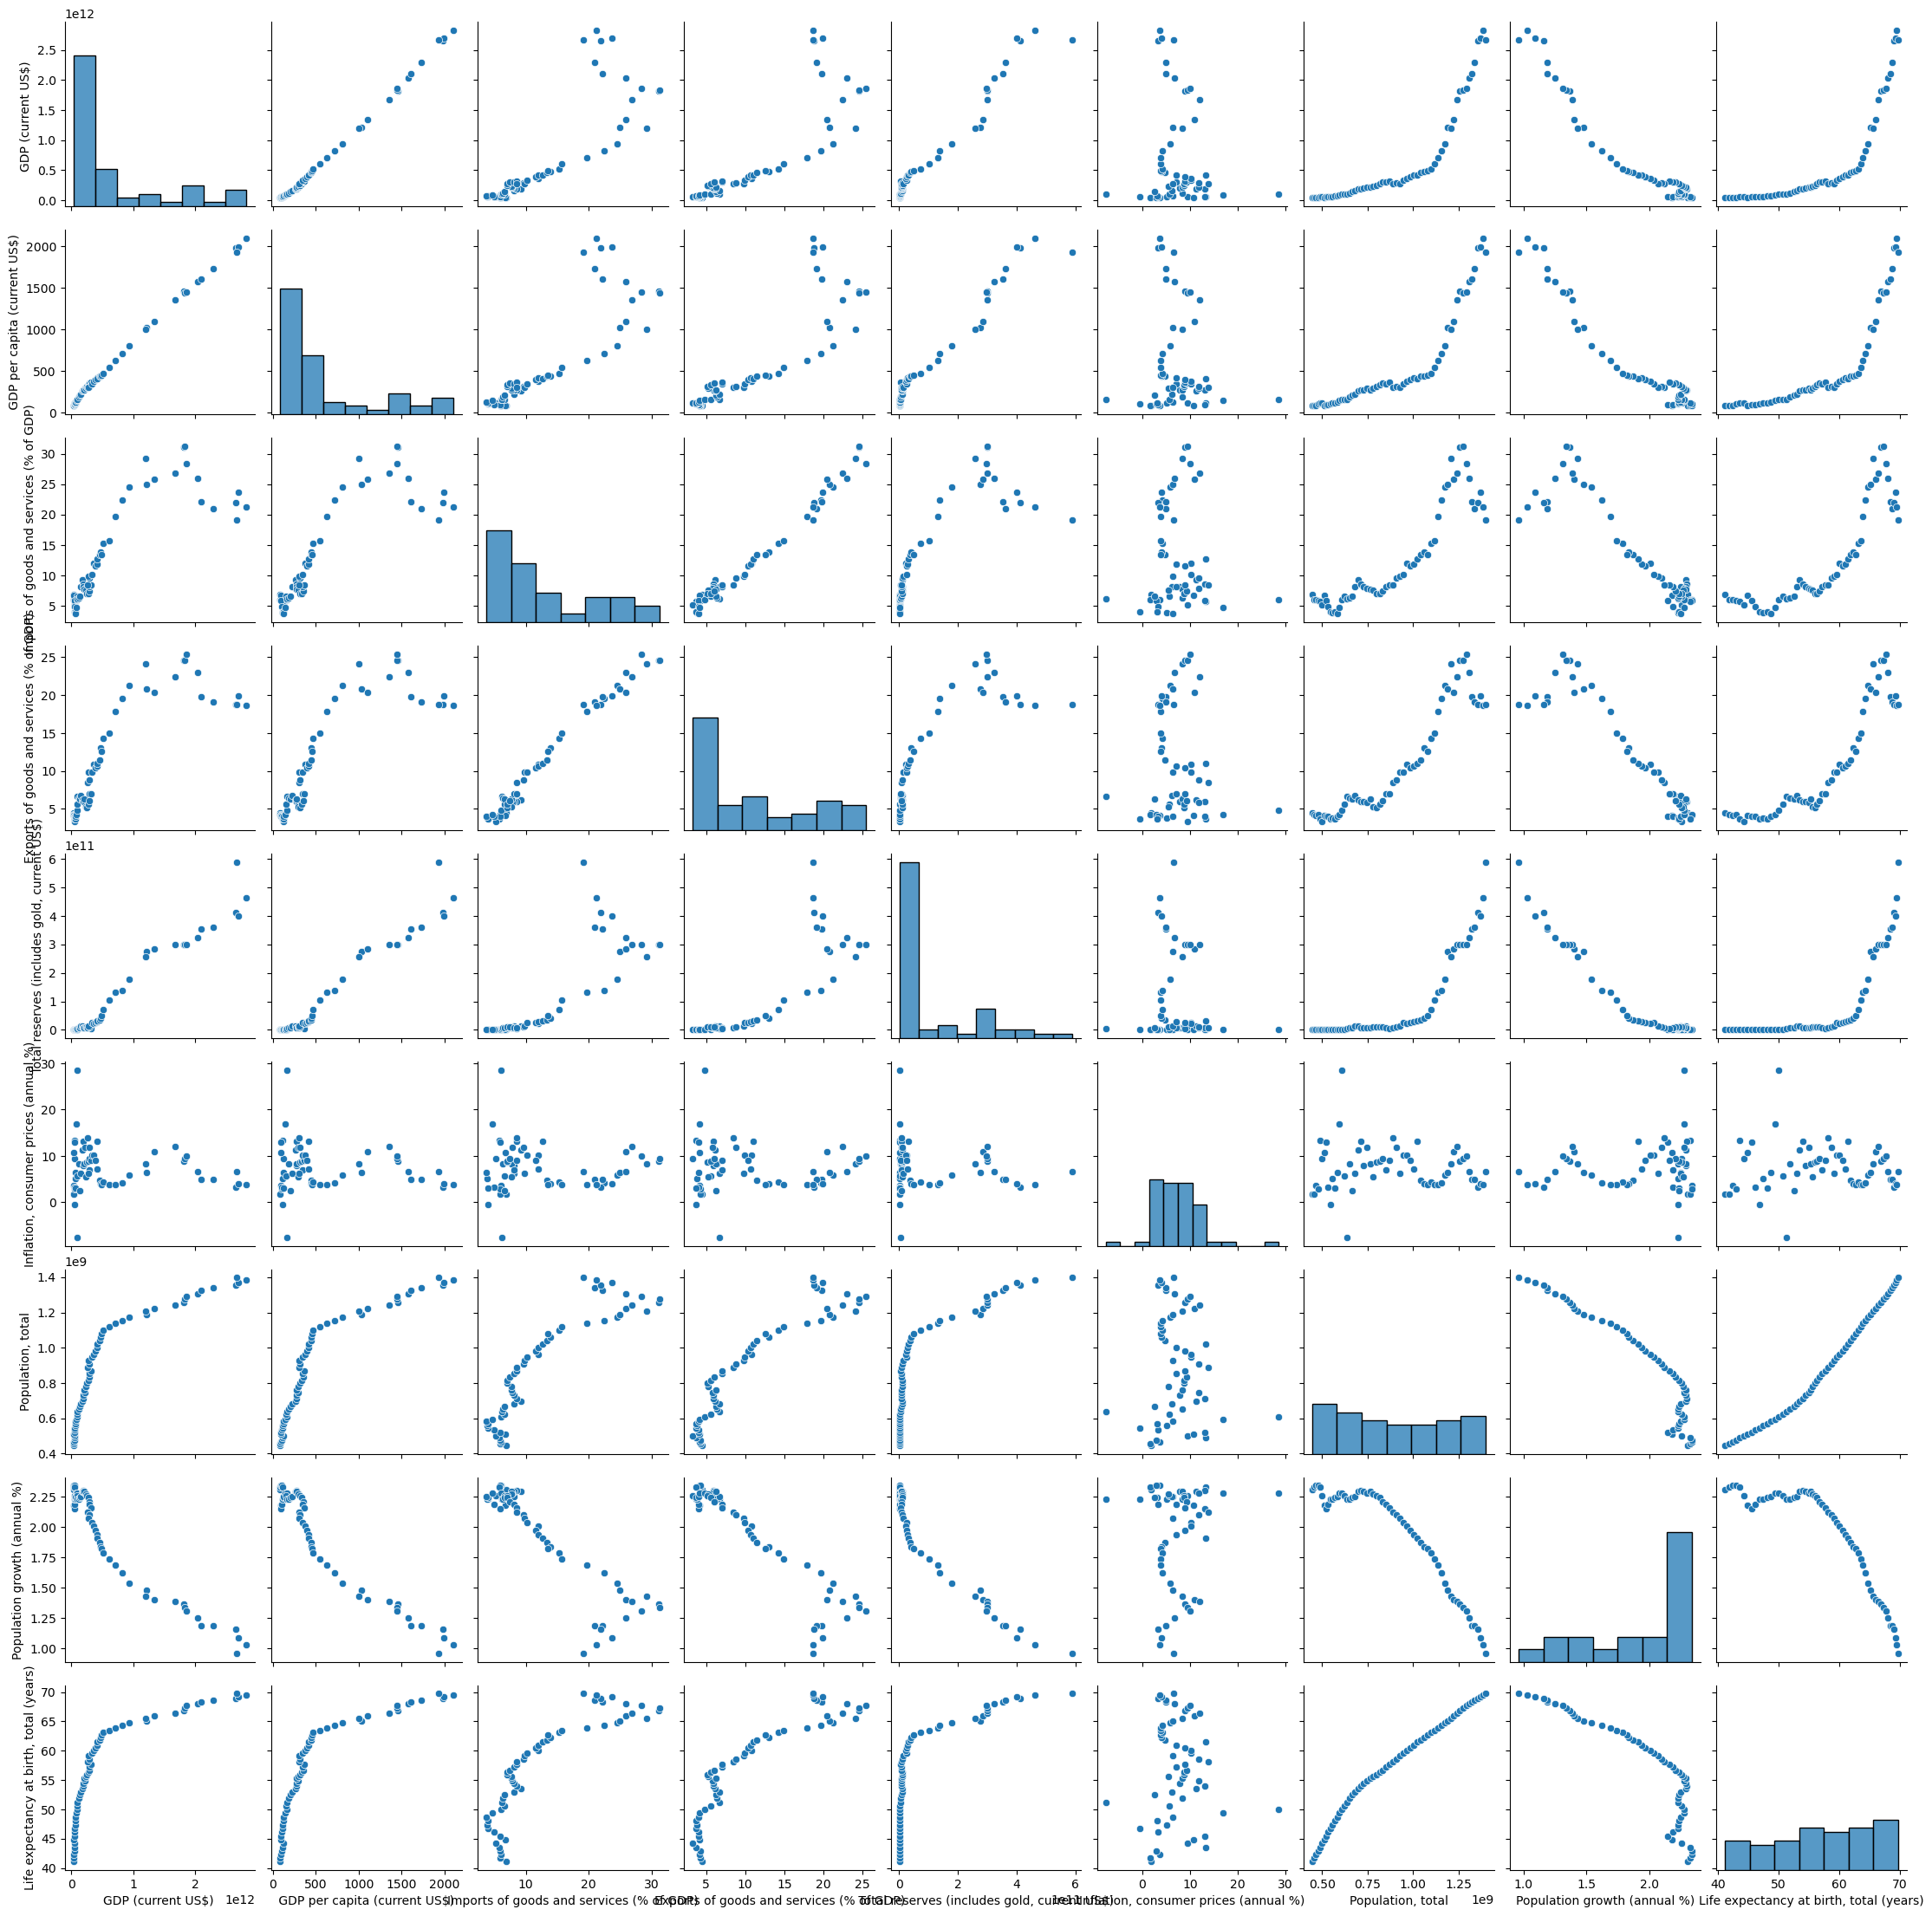

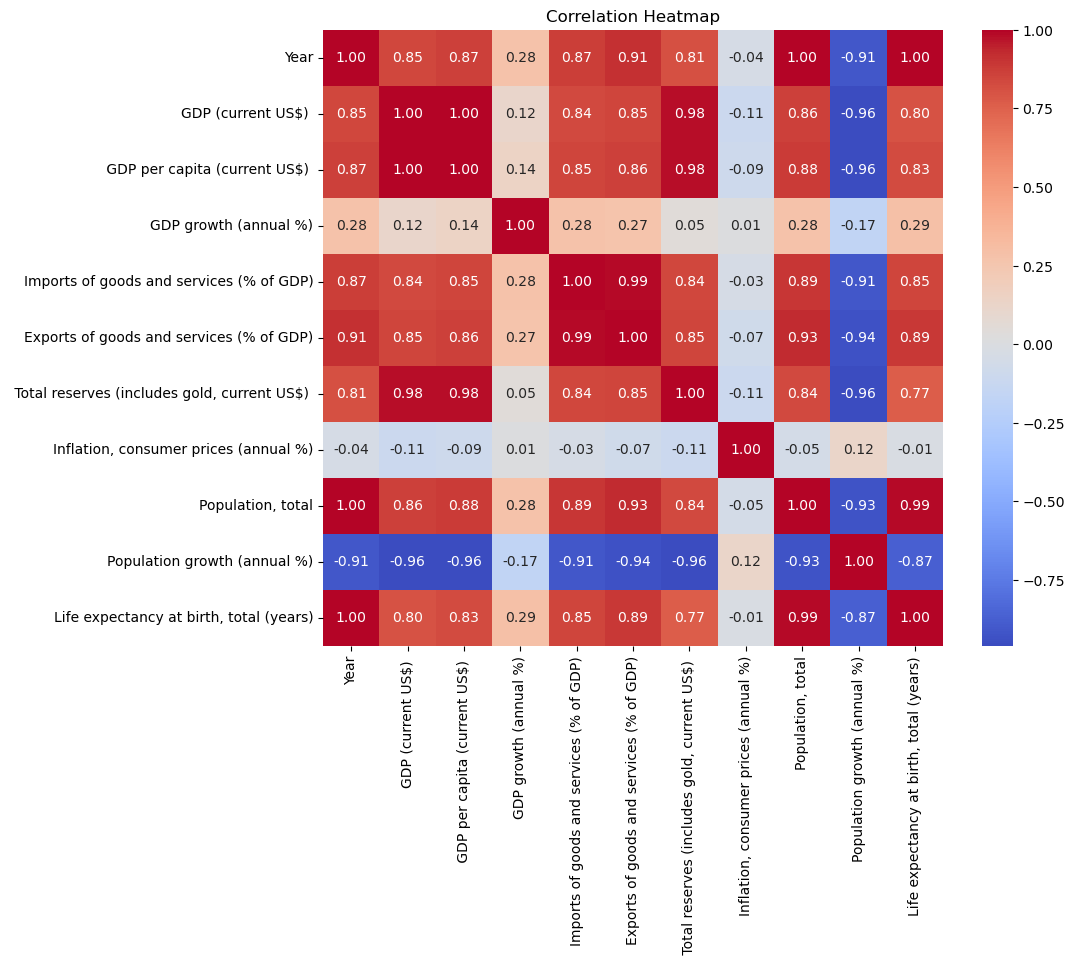

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numerical features
sns.pairplot(dataset, vars=['GDP (current US$) ', ' GDP per capita (current US$) ',
                        'Imports of goods and services (% of GDP)',
                        'Exports of goods and services (% of GDP)',
                        ' Total reserves (includes gold, current US$) ',
                        'Inflation, consumer prices (annual %)',
                        'Population, total',
                        'Population growth (annual %)',
                        'Life expectancy at birth, total (years)'])
plt.show()

# Correlation heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


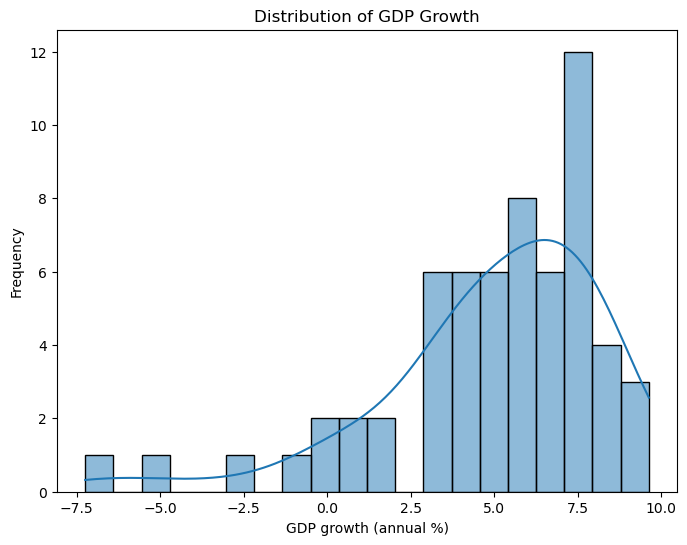

In [11]:
# Histogram for GDP growth
plt.figure(figsize=(8, 6))
sns.histplot(dataset['GDP growth (annual %)'], bins=20, kde=True)
plt.xlabel('GDP growth (annual %)')
plt.ylabel('Frequency')
plt.title('Distribution of GDP Growth')
plt.show()


In [12]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Display columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values > 0])

# Remove rows with missing values (if needed)
data_cleaned = dataset.dropna()


Columns with missing values:
Series([], dtype: int64)


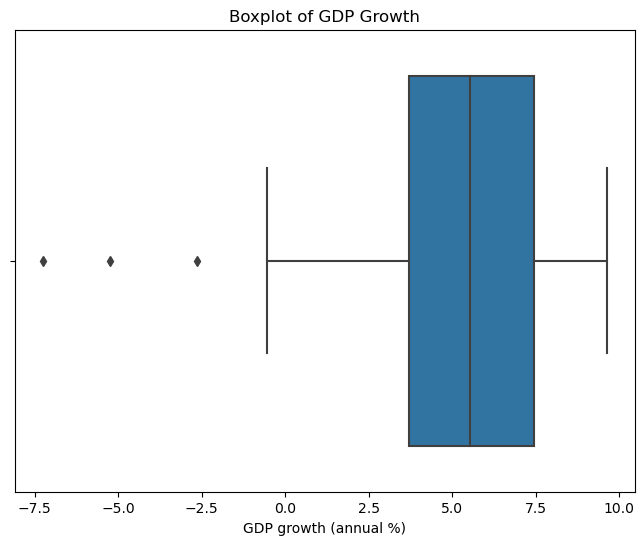

In [13]:
# Boxplot for GDP growth
plt.figure(figsize=(8, 6))
sns.boxplot(dataset['GDP growth (annual %)'])
plt.xlabel('GDP growth (annual %)')
plt.title('Boxplot of GDP Growth')
plt.show()


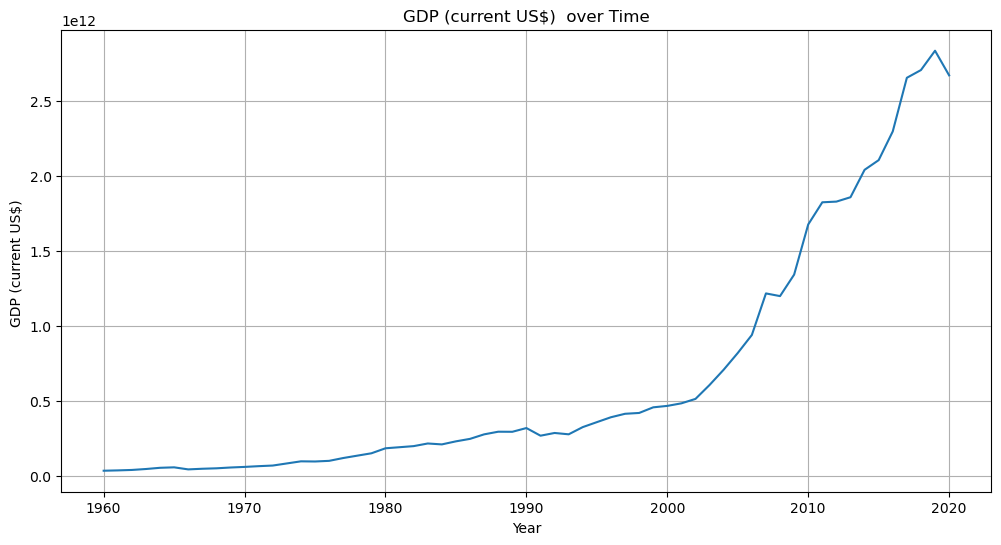

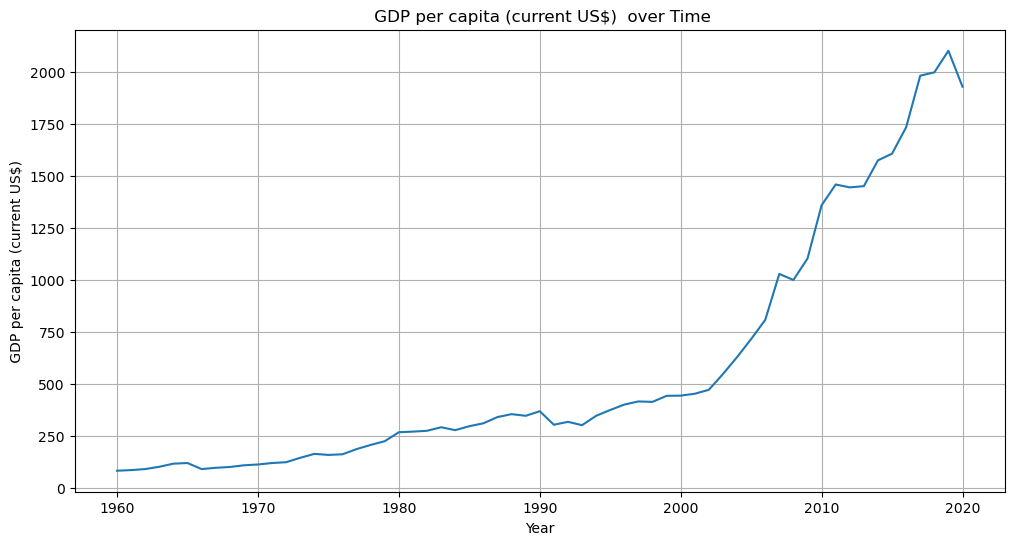

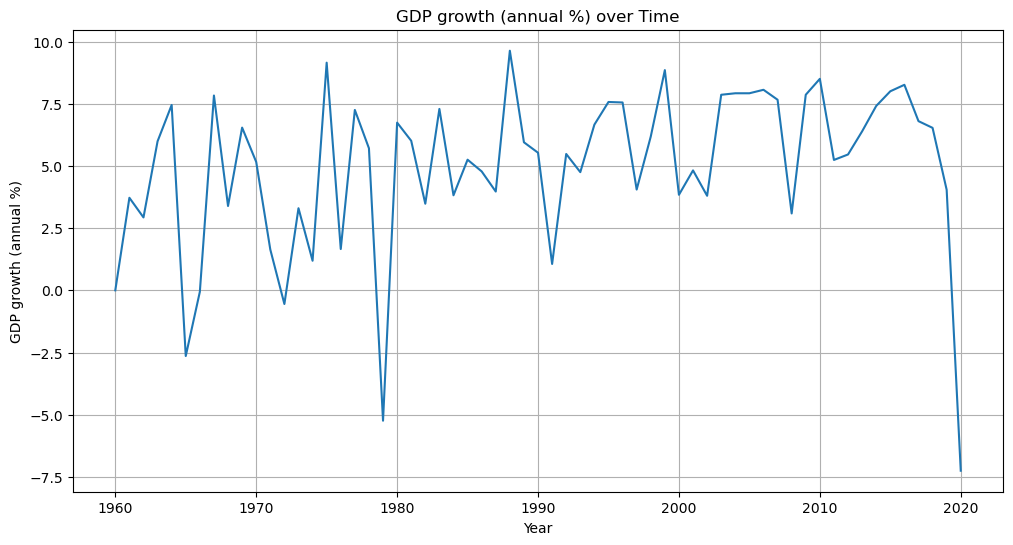

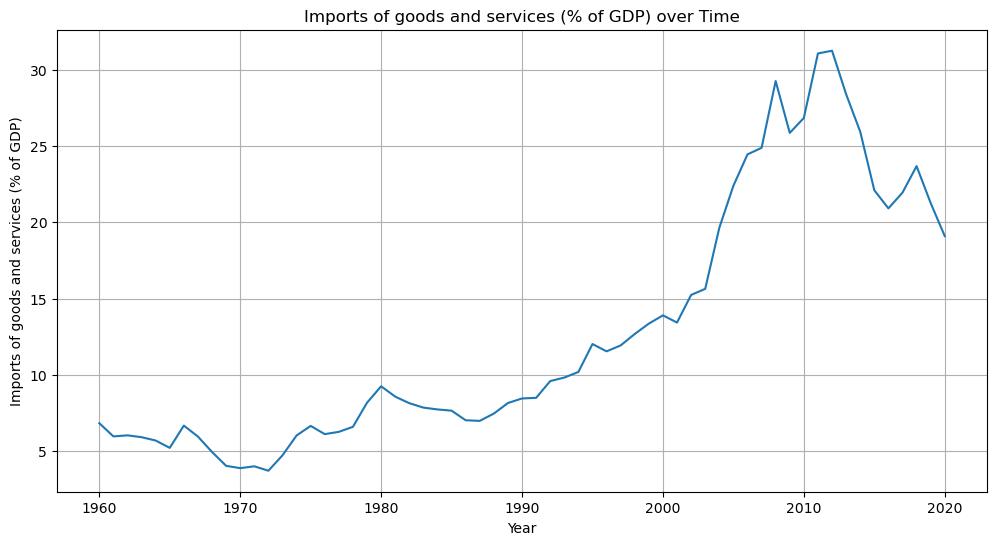

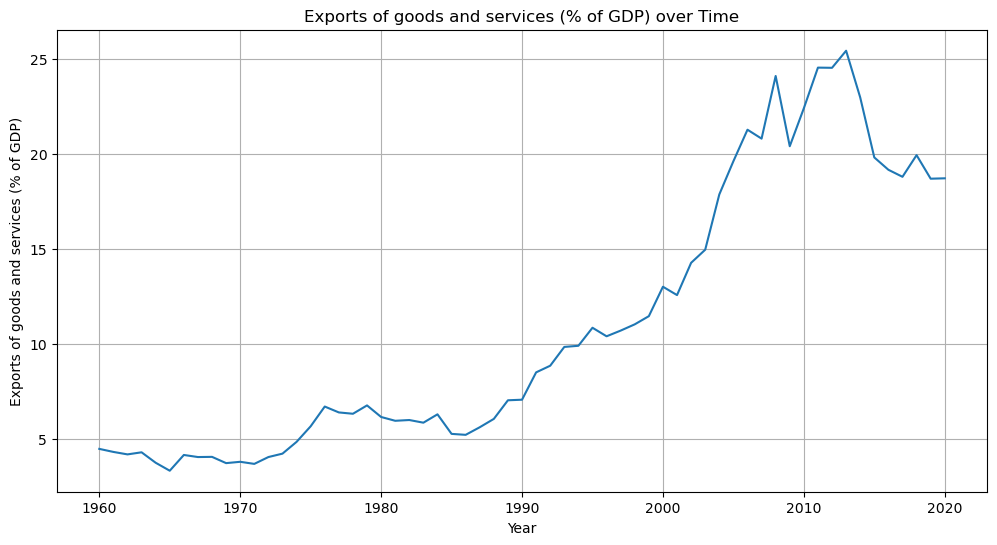

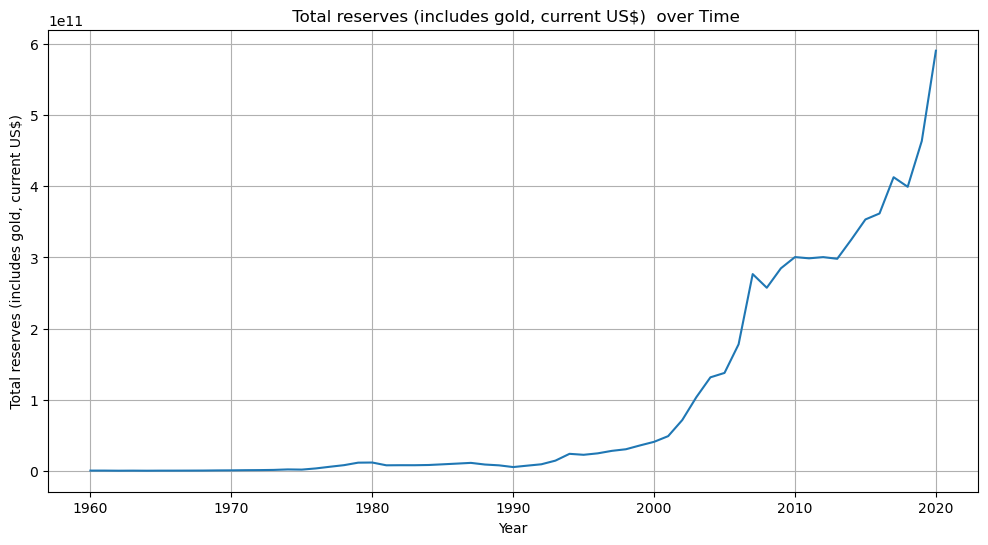

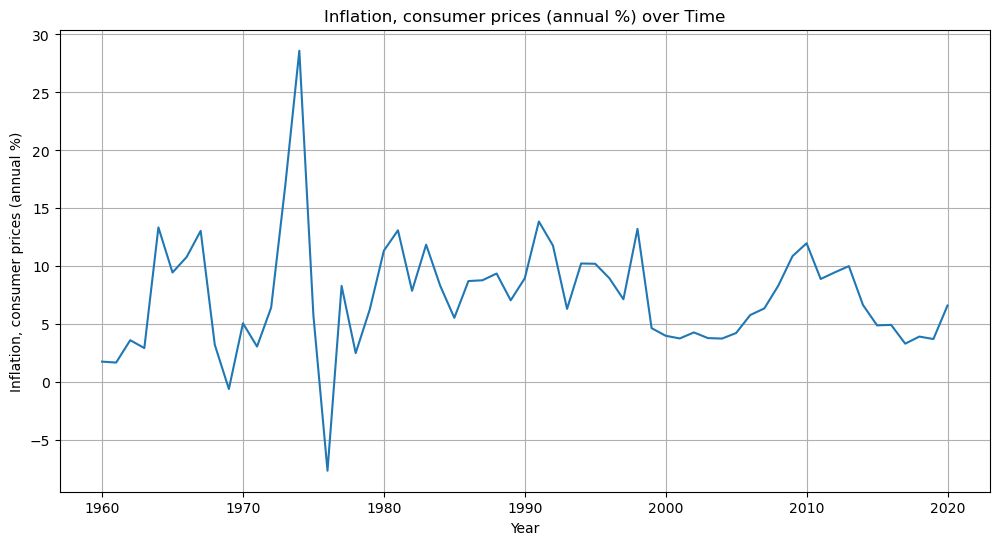

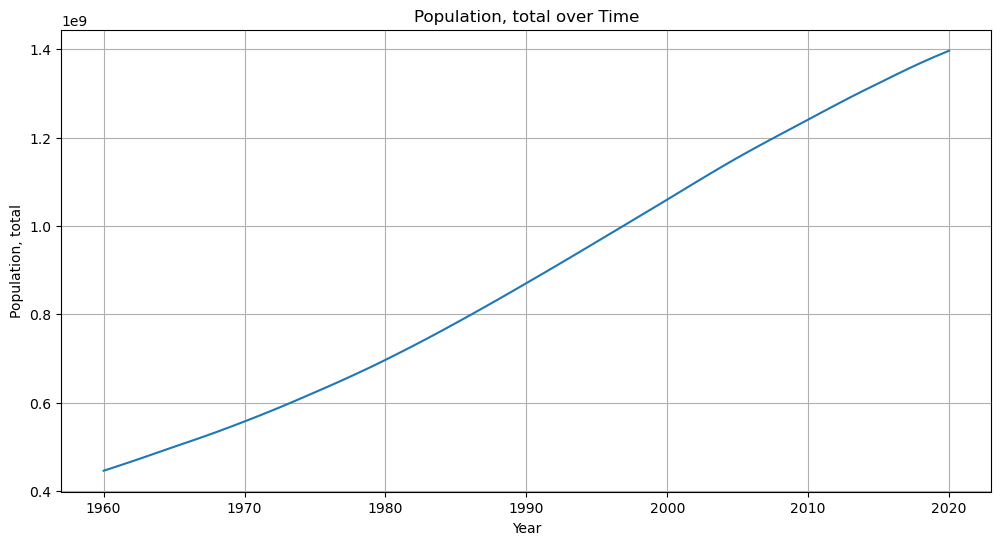

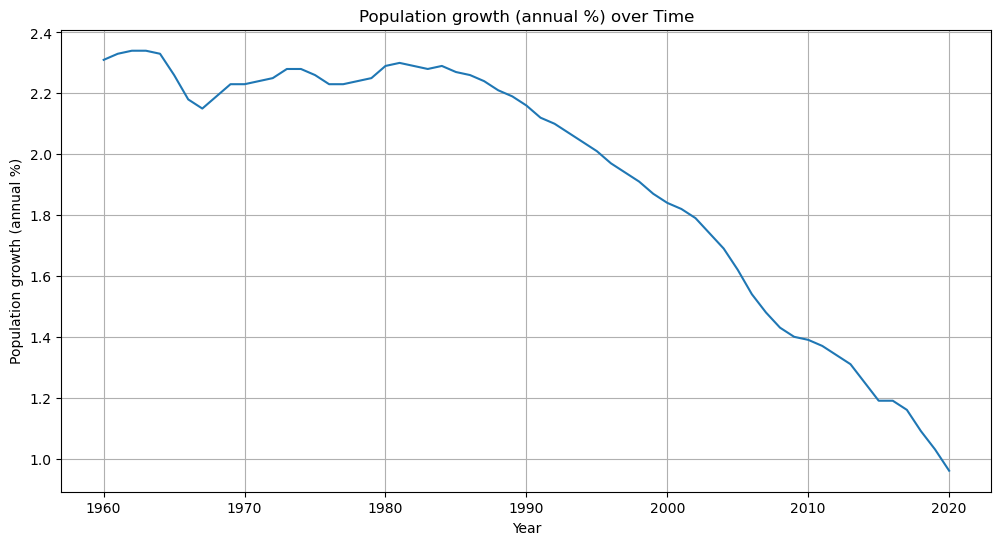

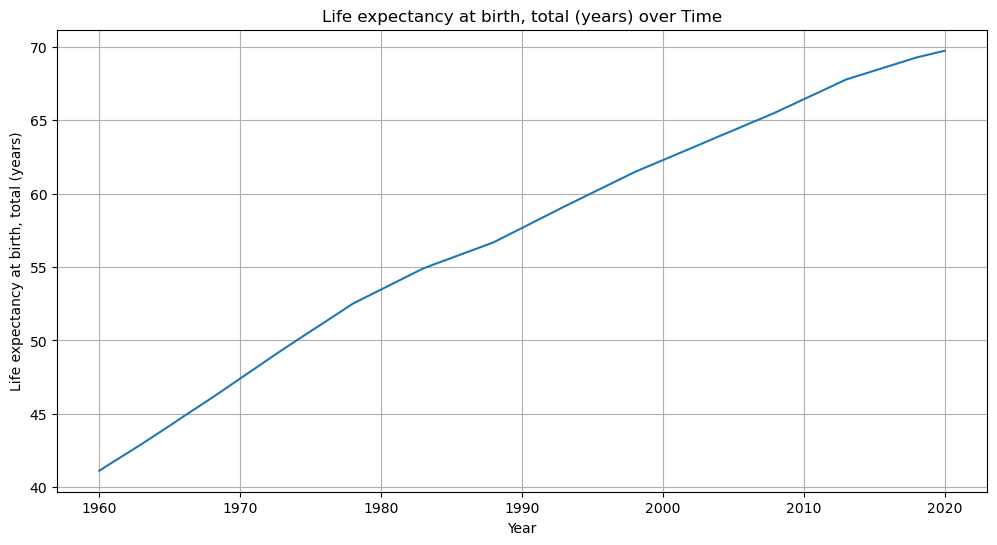

In [14]:
import matplotlib.pyplot as plt

# Assuming 'Year' is the x-axis for time
x = dataset['Year']

# List of variables to plot
variables = [
    'GDP (current US$) ',
    ' GDP per capita (current US$) ',
    'GDP growth (annual %)',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)'
]

# Loop through variables and create subplots
for variable in variables:
    y = dataset[variable]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.title(f'{variable} over Time')
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()


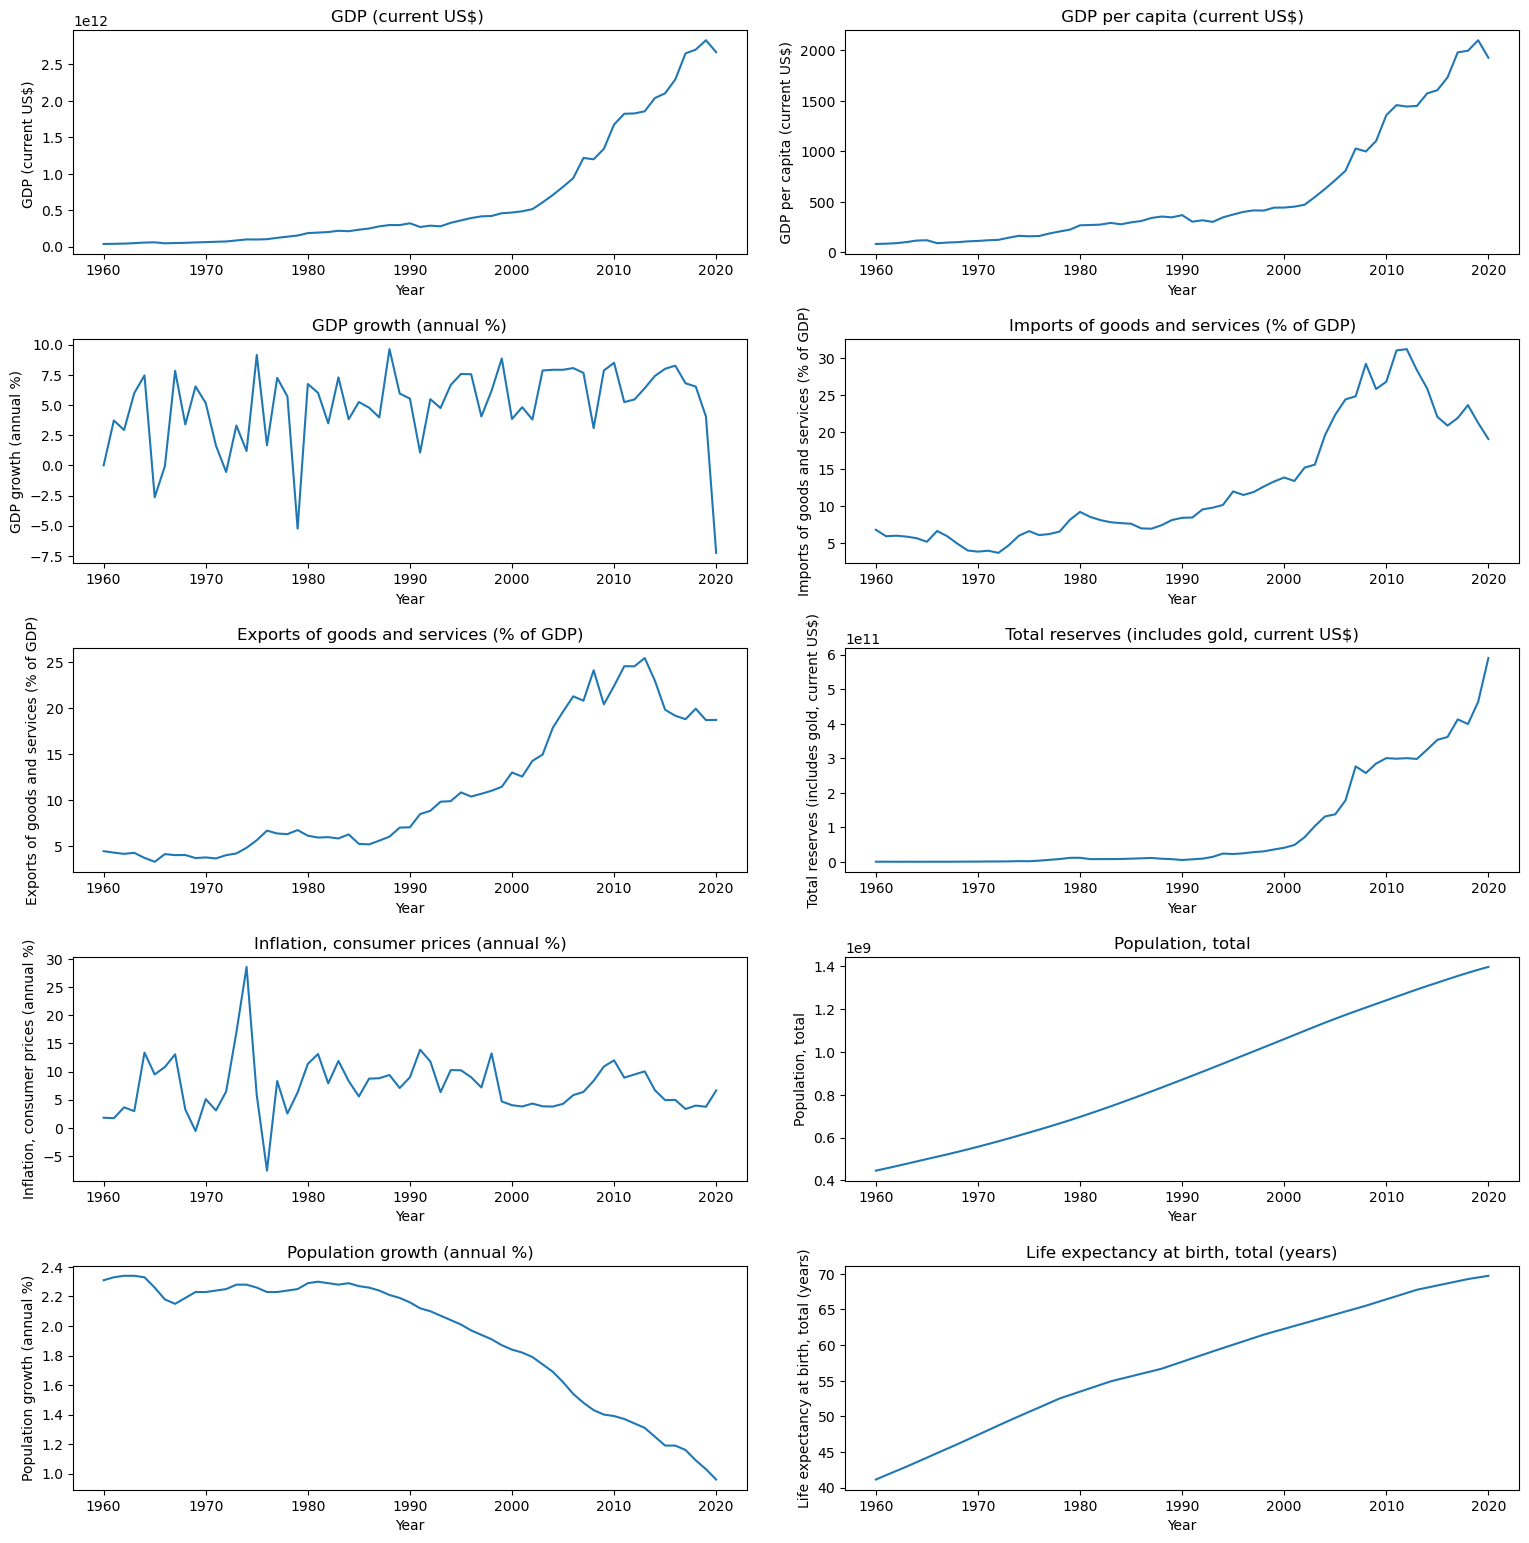

In [15]:
import matplotlib.pyplot as plt

# Assuming 'Year' is the x-axis for time
x = dataset['Year']

# List of variables to plot
variables = [
    'GDP (current US$) ',
    ' GDP per capita (current US$) ',
    'GDP growth (annual %)',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)'
]

# Define the number of rows and columns for the subplots
n_rows = 5
n_cols = 2

# Create a combined figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
fig.tight_layout(pad=4.0)  # Adjust subplot spacing

for i, variable in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    y = dataset[variable]
    ax = axes[row, col]

    ax.plot(x, y)
    ax.set_title(variable)
    ax.set_xlabel('Year')
    ax.set_ylabel(variable)

# Remove any unused subplots if the number of variables is less than n_rows * n_cols
for i in range(len(variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.show()


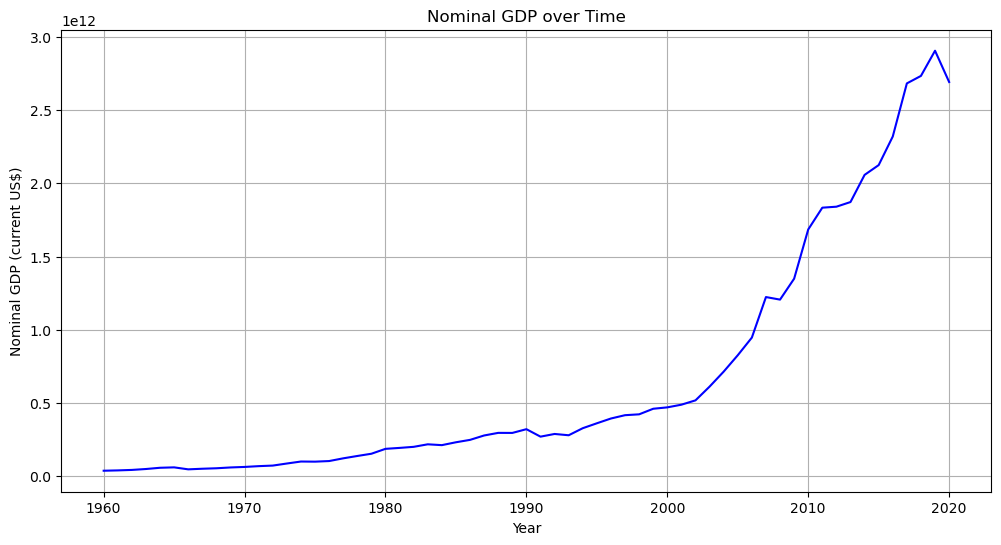

In [16]:
import pandas as pd

# Assuming 'Year' is the x-axis for time
x = dataset['Year']

# Calculate nominal GDP
nominal_gdp = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Create a plot for nominal GDP
plt.figure(figsize=(12, 6))
plt.plot(x, nominal_gdp, label='Nominal GDP', color='b')
plt.title('Nominal GDP over Time')
plt.xlabel('Year')
plt.ylabel('Nominal GDP (current US$)')
plt.grid(True)
plt.show()


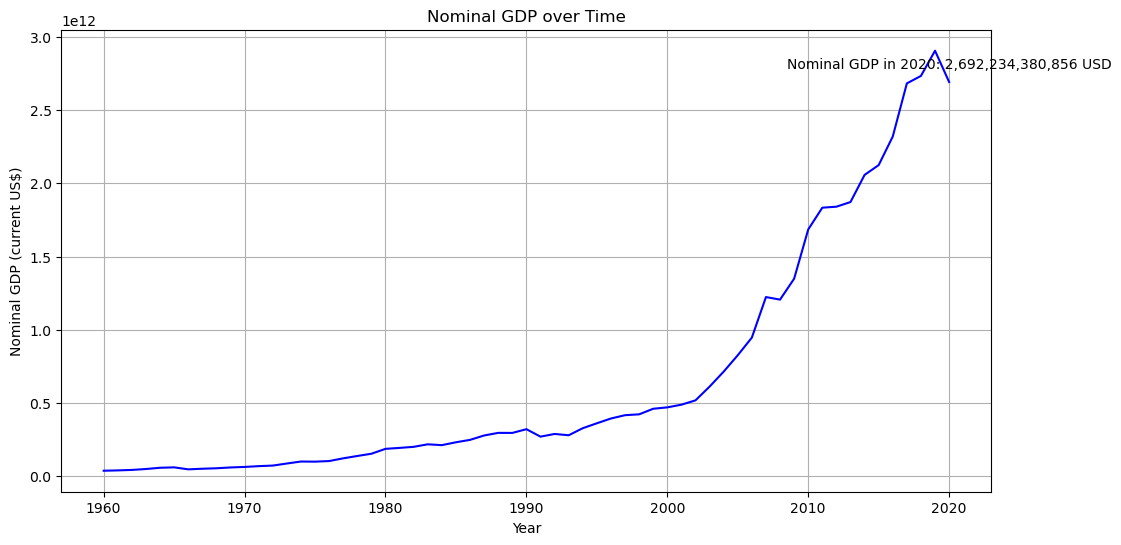

In [17]:
import pandas as pd

# Assuming 'Year' is the x-axis for time
x = dataset['Year']

# Calculate nominal GDP
nominal_gdp = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Create a plot for nominal GDP
plt.figure(figsize=(12, 6))
plt.plot(x, nominal_gdp, label='Nominal GDP', color='b')
plt.title('Nominal GDP over Time')
plt.xlabel('Year')
plt.ylabel('Nominal GDP (current US$)')
plt.grid(True)

# Annotate the graph with the value of nominal GDP in the final year (2020)
final_year = 2020
final_gdp = nominal_gdp[x == final_year].values[0]
plt.annotate(f'Nominal GDP in {final_year}: {final_gdp:,.0f} USD', (final_year, final_gdp), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


In [18]:
# Add 'GDP growth (annual %)' to the list of features
features = [' GDP per capita (current US$) ',
            'Imports of goods and services (% of GDP)',
            'Exports of goods and services (% of GDP)',
            ' Total reserves (includes gold, current US$) ',
            'Inflation, consumer prices (annual %)', 'Population, total',
            'Population growth (annual %)',
            'Life expectancy at birth, total (years)',
            'GDP growth (annual %)']

# Set the target variable as 'Nominal GDP'
target = 'Nominal GDP'


In [19]:
# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Define the features and target variable
features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

target = 'Nominal GDP'


In [44]:
# Load your dataset
dataset = pd.read_csv('indianEco.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']


In [45]:
import pandas as pd

# Load and preprocess your dataset as previously described

# Define the feature to predict and the year for prediction
feature_to_predict = ' GDP per capita (current US$) '
year_to_predict = 2035

# Section 1: Filter data for the feature you want to predict
filtered_data = dataset[dataset['Year'] >= 1960]

# Section 2: Perform a linear regression model on the selected feature
# Assuming you have data for that feature, you can use a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(filtered_data[['Year']], filtered_data[feature_to_predict])

# Section 3: Predict the feature value for 2035
predicted_feature_value_2035 = model.predict([[year_to_predict]])[0]

# Section 4: Print the predicted feature value for 2035
print(f'Predicted {feature_to_predict} for 2035: {predicted_feature_value_2035:,.2f} USD')


Predicted  GDP per capita (current US$)  for 2035: 1,856.28 USD


In [46]:
import pandas as pd

# Load and preprocess your dataset as previously described

# Define the features to predict and the year for prediction
features_to_predict = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

year_to_predict = 2035

# Initialize a dictionary to store the predicted feature values
predicted_features_2035 = {}

# Section 1: Filter data for the features you want to predict
filtered_data = dataset[dataset['Year'] >= 1960]

# Section 2: Predict each feature using a linear regression model
from sklearn.linear_model import LinearRegression

for feature in features_to_predict:
    # Create a linear regression model for the current feature
    model = LinearRegression()
    model.fit(filtered_data[['Year']], filtered_data[feature])

    # Predict the feature value for 2035
    predicted_feature_value_2035 = model.predict([[year_to_predict]])[0]

    # Store the predicted feature value in the dictionary
    predicted_features_2035[feature] = predicted_feature_value_2035

# Section 3: Print the predicted feature values for 2035
for feature, value in predicted_features_2035.items():
    print(f'Predicted {feature} for 2035: {value:,.2f}')


Predicted  GDP per capita (current US$)  for 2035: 1,856.28
Predicted Imports of goods and services (% of GDP) for 2035: 30.81
Predicted Exports of goods and services (% of GDP) for 2035: 27.16
Predicted  Total reserves (includes gold, current US$)  for 2035: 407,157,220,633.08
Predicted Inflation, consumer prices (annual %) for 2035: 6.95
Predicted Population, total for 2035: 1,643,499,887.00
Predicted Population growth (annual %) for 2035: 0.96
Predicted Life expectancy at birth, total (years) for 2035: 78.49
Predicted GDP growth (annual %) for 2035: 7.30


In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
dataset = pd.read_csv('indianEco.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Section 1: Data Preprocessing
# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Define the features and target variable
features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

target = 'Nominal GDP'

# Section 2: Train and Test the Model
X = dataset[features]
y = dataset[target]

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination) to assess model fit
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Section 3: Predict Single Feature for 2035 (e.g., GDP per capita)
feature_to_predict = ' GDP per capita (current US$) '
year_to_predict = 2035

# Filter data for the feature you want to predict
filtered_data = dataset[dataset['Year'] >= 1960]

# Create a linear regression model for the current feature
model = LinearRegression()
model.fit(filtered_data[['Year']], filtered_data[feature_to_predict])

# Predict the feature value for 2035
predicted_feature_value_2035 = model.predict([[year_to_predict]])[0]

# Print the predicted feature value for 2035
print(f'Predicted {feature_to_predict} for 2035: {predicted_feature_value_2035:,.2f} USD')

# Section 4: Predict Multiple Features for 2035
features_to_predict = [
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

# Initialize a dictionary to store the predicted feature values
predicted_features_2035 = {}

# Predict each feature using a linear regression model
for feature in features_to_predict:
    # Create a linear regression model for the current feature
    model = LinearRegression()
    model.fit(filtered_data[['Year']], filtered_data[feature])

    # Predict the feature value for 2035
    predicted_feature_value_2035 = model.predict([[year_to_predict]])[0]

    # Store the predicted feature value in the dictionary
    predicted_features_2035[feature] = predicted_feature_value_2035

# Print the predicted feature values for 2035
for feature, value in predicted_features_2035.items():
    print(f'Predicted {feature} for 2035: {value:,.2f}')


Mean Squared Error: 2.4394273351821794e+20
R-squared (R2): 0.9996800026831436
Predicted  GDP per capita (current US$)  for 2035: 1,856.28 USD
Predicted Imports of goods and services (% of GDP) for 2035: 30.81
Predicted Exports of goods and services (% of GDP) for 2035: 27.16
Predicted  Total reserves (includes gold, current US$)  for 2035: 407,157,220,633.08
Predicted Inflation, consumer prices (annual %) for 2035: 6.95
Predicted Population, total for 2035: 1,643,499,887.00
Predicted Population growth (annual %) for 2035: 0.96
Predicted Life expectancy at birth, total (years) for 2035: 78.49
Predicted GDP growth (annual %) for 2035: 7.30


In [48]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
dataset = pd.read_csv('indianEco.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Define the features and target variable
features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

target = 'Nominal GDP'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X = dataset[features]
y = dataset[target]

# Feature Engineering
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning (Ridge Regression)
alphas = [0.1, 1.0, 10.0]
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = scores.mean()
    
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alpha

# Train Ridge Regression with the best alpha
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = final_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination) to assess model fit
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Best Ridge Alpha: {best_alpha}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Predict Nominal GDP for 2035
# Assuming you have predicted values for all features in a dictionary named 'predicted_values_2035'
predicted_values_2035 = {
    ' GDP per capita (current US$) ': 1856.28,
    'Imports of goods and services (% of GDP)': 30.81,
    'Exports of goods and services (% of GDP)': 27.16,
    ' Total reserves (includes gold, current US$) ': 407157220633.08,
    'Inflation, consumer prices (annual %)': 6.95,
    'Population, total': 1643499887.00,
    'Population growth (annual %)': 0.96,
    'Life expectancy at birth, total (years)': 78.49,
    'GDP growth (annual %)': 7.30
}

# Feature Engineering for Prediction
predicted_features = poly.transform([[predicted_values_2035[feature] for feature in features]])
predicted_features_scaled = scaler.transform(predicted_features)

# Predict Nominal GDP for 2035
predicted_gdp_2035 = final_model.predict(predicted_features_scaled)[0]

# Convert the predicted Nominal GDP to trillions
predicted_gdp_trillions = predicted_gdp_2035 / 1_000_000_000_000

# Print the predicted Nominal GDP for 2035 in trillions
print(f'Predicted Nominal GDP for 2035: {predicted_gdp_trillions:.2f} trillion USD')


Best Ridge Alpha: 0.1
Mean Squared Error: 2.525078960472175e+19
R-squared (R2): 0.9999668767140325
Predicted Nominal GDP for 2035: 2.94 trillion USD


In [49]:
import pandas as pd

# Assuming you have a DataFrame with the provided columns
# Sort the data by year if it's not already sorted
dataset = dataset.sort_values(by='Year')

# Specify the column you want to calculate the growth rate for
column_name = ' GDP per capita (current US$) '

# Find the beginning and ending values
beginning_value = dataset[column_name].iloc[0]
ending_value = dataset[column_name].iloc[-1]

# Calculate the number of years
number_of_years = dataset['Year'].max() - dataset['Year'].min()

# Calculate the annual growth rate
annual_growth_rate = ((ending_value / beginning_value) ** (1 / number_of_years) - 1) * 100

print(f"Annual Growth Rate of {column_name}: {annual_growth_rate:.2f}% per year")


Annual Growth Rate of  GDP per capita (current US$) : 5.40% per year


<Figure size 1000x600 with 0 Axes>

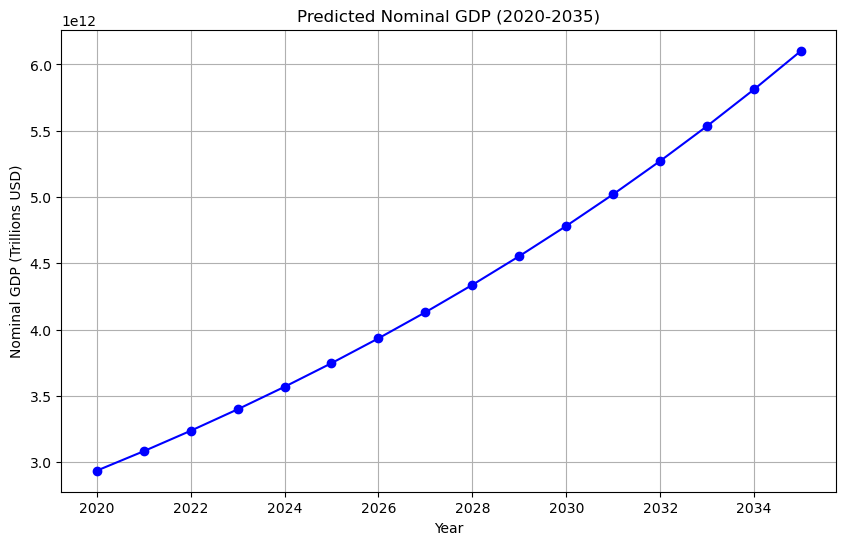

In [50]:
import matplotlib.pyplot as plt

# Define years from 2020 to 2035
years = range(2020, 2036)

# Define the predicted Nominal GDP values for each year
predicted_gdp_values = [predicted_gdp_2035]  # Replace with your actual prediction for 2020

# Placeholder annual growth rate (5% per year)
annual_growth_rate = 0.05

for _ in range(2021, 2036):
    predicted_gdp_values.append(predicted_gdp_values[-1] * (1 + annual_growth_rate))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_gdp_values, marker='o', linestyle='-', color='b')
plt.title('Predicted Nominal GDP (2020-2035)')
plt.xlabel('Year')
plt.ylabel('Nominal GDP (Trillions USD)')
plt.grid(True)

# Display the plot
plt.show()


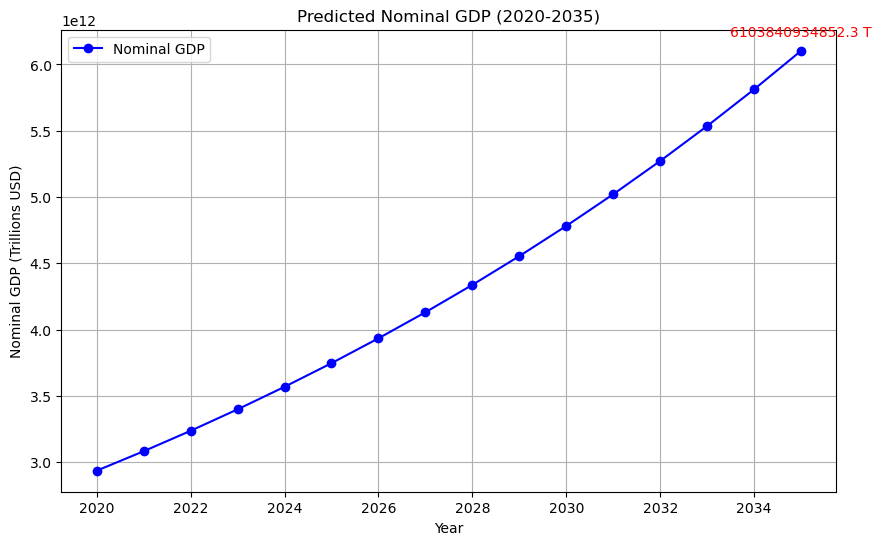

Nominal GDP in 2035: 6103840934852.3 T


In [51]:
import matplotlib.pyplot as plt

# Define years from 2020 to 2035
years = range(2020, 2036)

# Define the predicted Nominal GDP values for each year
predicted_gdp_values = [predicted_gdp_2035]  # Replace with your actual prediction for 2020

# Placeholder annual growth rate (5% per year)
annual_growth_rate = 0.05

for _ in range(2021, 2036):
    predicted_gdp = predicted_gdp_values[-1] * (1 + annual_growth_rate)
    predicted_gdp_values.append(predicted_gdp)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_gdp_values, marker='o', linestyle='-', color='b', label='Nominal GDP')
plt.title('Predicted Nominal GDP (2020-2035)')
plt.xlabel('Year')
plt.ylabel('Nominal GDP (Trillions USD)')
plt.grid(True)

# Label data points on the graph for 2035 with red color
for year, gdp in zip(years, predicted_gdp_values):
    if year == 2035:
        plt.annotate(f'{gdp:.1f} T', (year, gdp), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Display the plot
plt.legend()
plt.show()

# Print the predicted Nominal GDP value for 2035 in the output
for year, gdp in zip(years, predicted_gdp_values):
    if year == 2035:
        print(f'Nominal GDP in {year}: {gdp:.1f} T')


In [64]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load your dataset
dataset = pd.read_csv('indianEco.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Define the features and target variable
features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

target = 'Nominal GDP'

# Feature Engineering
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(dataset[features])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_scaled, dataset[target])

# Define the values for features in 2035
predicted_values_2035 = {
    ' GDP per capita (current US$) ': 1856.28,
    'Imports of goods and services (% of GDP)': 30.81,
    'Exports of goods and services (% of GDP)': 27.16,
    ' Total reserves (includes gold, current US$) ': 407157220633.08,
    'Inflation, consumer prices (annual %)': 6.95,
    'Population, total': 1643499887.00,
    'Population growth (annual %)': 0.96,
    'Life expectancy at birth, total (years)': 78.49,
    'GDP growth (annual %)': 7.30
}

# Feature Engineering for Prediction
predicted_features = poly.transform([[predicted_values_2035[feature] for feature in features]])
predicted_features_scaled = scaler.transform(predicted_features)

# Predict Nominal GDP for 2035 using the model
predicted_gdp_2035 = model.predict(predicted_features_scaled)[0]

# Simulate the growth with a 5% annual growth rate
annual_growth_rate = 0.05
years_until_2035 = 2035 - 2020
for _ in range(years_until_2035):
    predicted_gdp_2035 *= (1 + annual_growth_rate)

# Convert the predicted Nominal GDP to trillions
predicted_gdp_trillions = predicted_gdp_2035 / 1_000_000_000_000

# Print the predicted Nominal GDP for 2035
print(f'Predicted Nominal GDP for 2035: {predicted_gdp_trillions:.1f} trillion USD')


Predicted Nominal GDP for 2035: 6.0 trillion USD


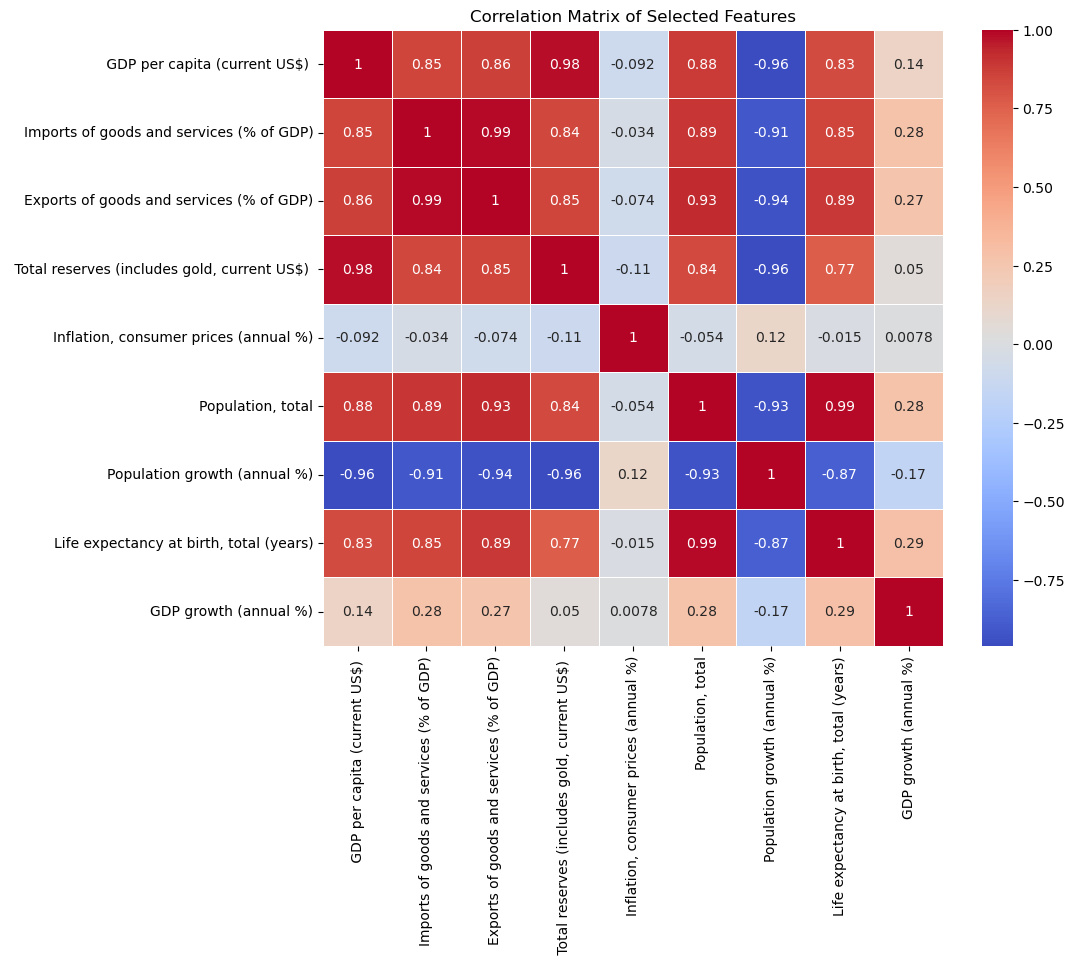

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
dataset = pd.read_csv('indianEco.csv')

# Select relevant features for correlation matrix
selected_features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

# Subset the dataset with selected features
selected_data = dataset[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


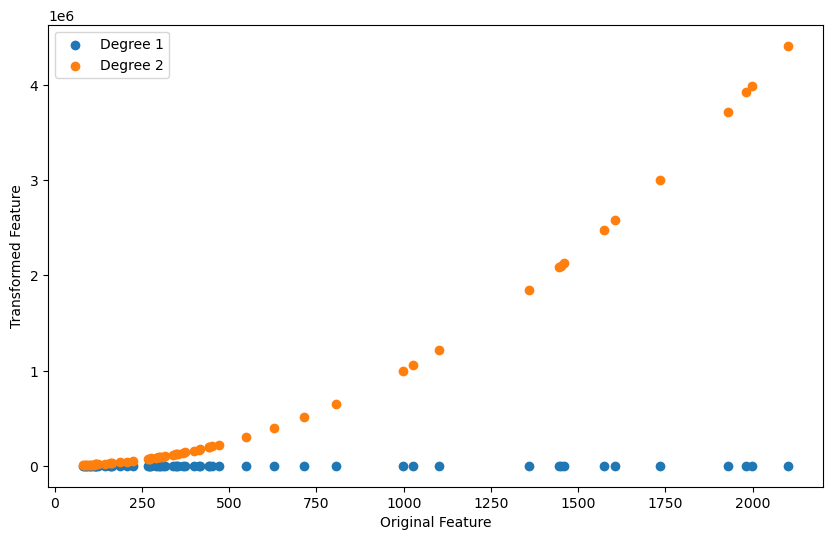

In [55]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Assuming X is your input feature (e.g., ' GDP per capita (current US$) ')
X = dataset[' GDP per capita (current US$) '].values.reshape(-1, 1)

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Plot the original and transformed features
plt.figure(figsize=(10, 6))
plt.scatter(X, X_poly[:, 1], label='Degree 1')
plt.scatter(X, X_poly[:, 2], label='Degree 2')
plt.xlabel('Original Feature')
plt.ylabel('Transformed Feature')
plt.legend()
plt.show()


In [57]:
pip install graphviz


     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 1.0968637680792994e+22
R-squared: 0.9835508837332054


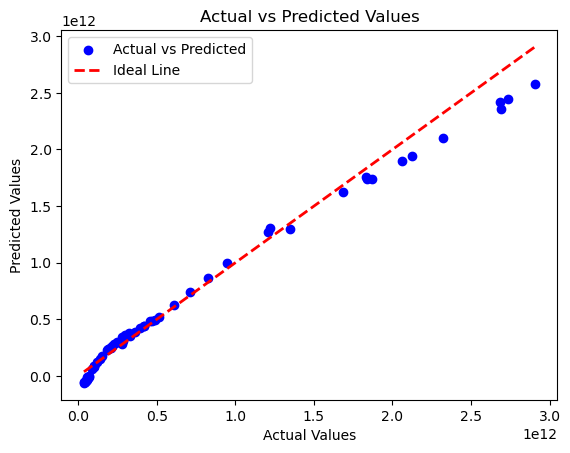

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable
# Replace this with your actual data
# X, y = ...

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=5)  # Assuming 5-fold cross-validation

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

# Create a chart comparing actual vs predicted values with different colors
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


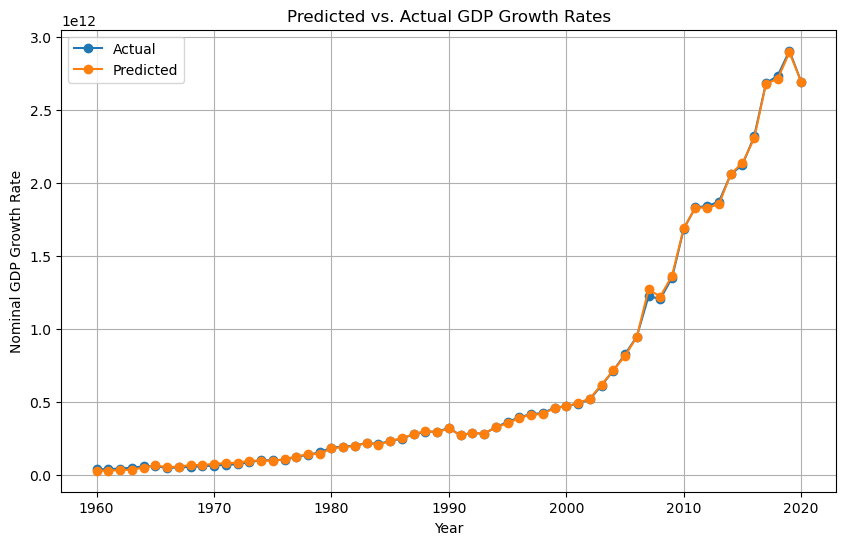

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

# Load your dataset
dataset = pd.read_csv('indianEco.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Filter data from 1960 to 2020
dataset = dataset[(dataset['Year'] >= 1960) & (dataset['Year'] <= 2020)]

# Drop rows with missing values
dataset = dataset.dropna()

# Calculate 'Nominal GDP' based on the formula
dataset['Nominal GDP'] = dataset[' GDP per capita (current US$) '] * dataset['Population, total']

# Define the features and target variable
features = [
    ' GDP per capita (current US$) ',
    'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    ' Total reserves (includes gold, current US$) ',
    'Inflation, consumer prices (annual %)',
    'Population, total',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'GDP growth (annual %)'
]

target = 'Nominal GDP'

# Feature Engineering
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(dataset[features])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_scaled, dataset[target])

# Predict Nominal GDP for the years in the dataset
dataset['Predicted Nominal GDP'] = model.predict(X_scaled)

# Plot the predicted vs. actual GDP growth rates over different years
plt.figure(figsize=(10, 6))
plt.plot(dataset['Year'], dataset[target], label='Actual', marker='o')
plt.plot(dataset['Year'], dataset['Predicted Nominal GDP'], label='Predicted', marker='o')
plt.title('Predicted vs. Actual GDP Growth Rates')
plt.xlabel('Year')
plt.ylabel('Nominal GDP Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


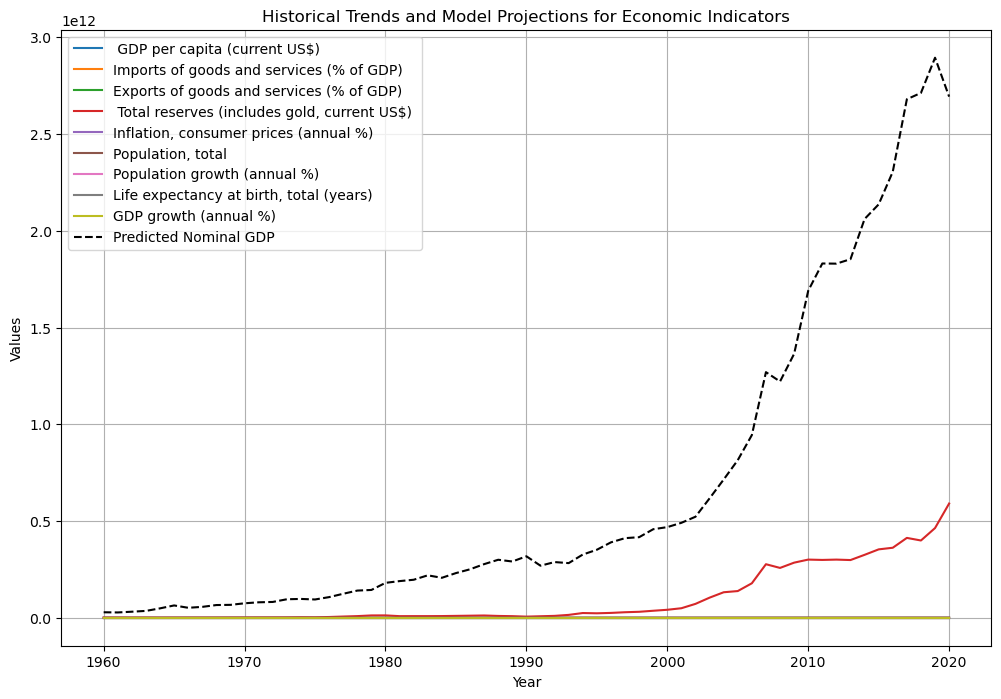

In [71]:
# Line Charts
plt.figure(figsize=(12, 8))

# Plot each feature over the years
for feature in features:
    plt.plot(dataset['Year'], dataset[feature], label=feature)

# Plot the predicted Nominal GDP
plt.plot(dataset['Year'], dataset['Predicted Nominal GDP'], label='Predicted Nominal GDP', linestyle='--', color='black')

plt.title('Historical Trends and Model Projections for Economic Indicators')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


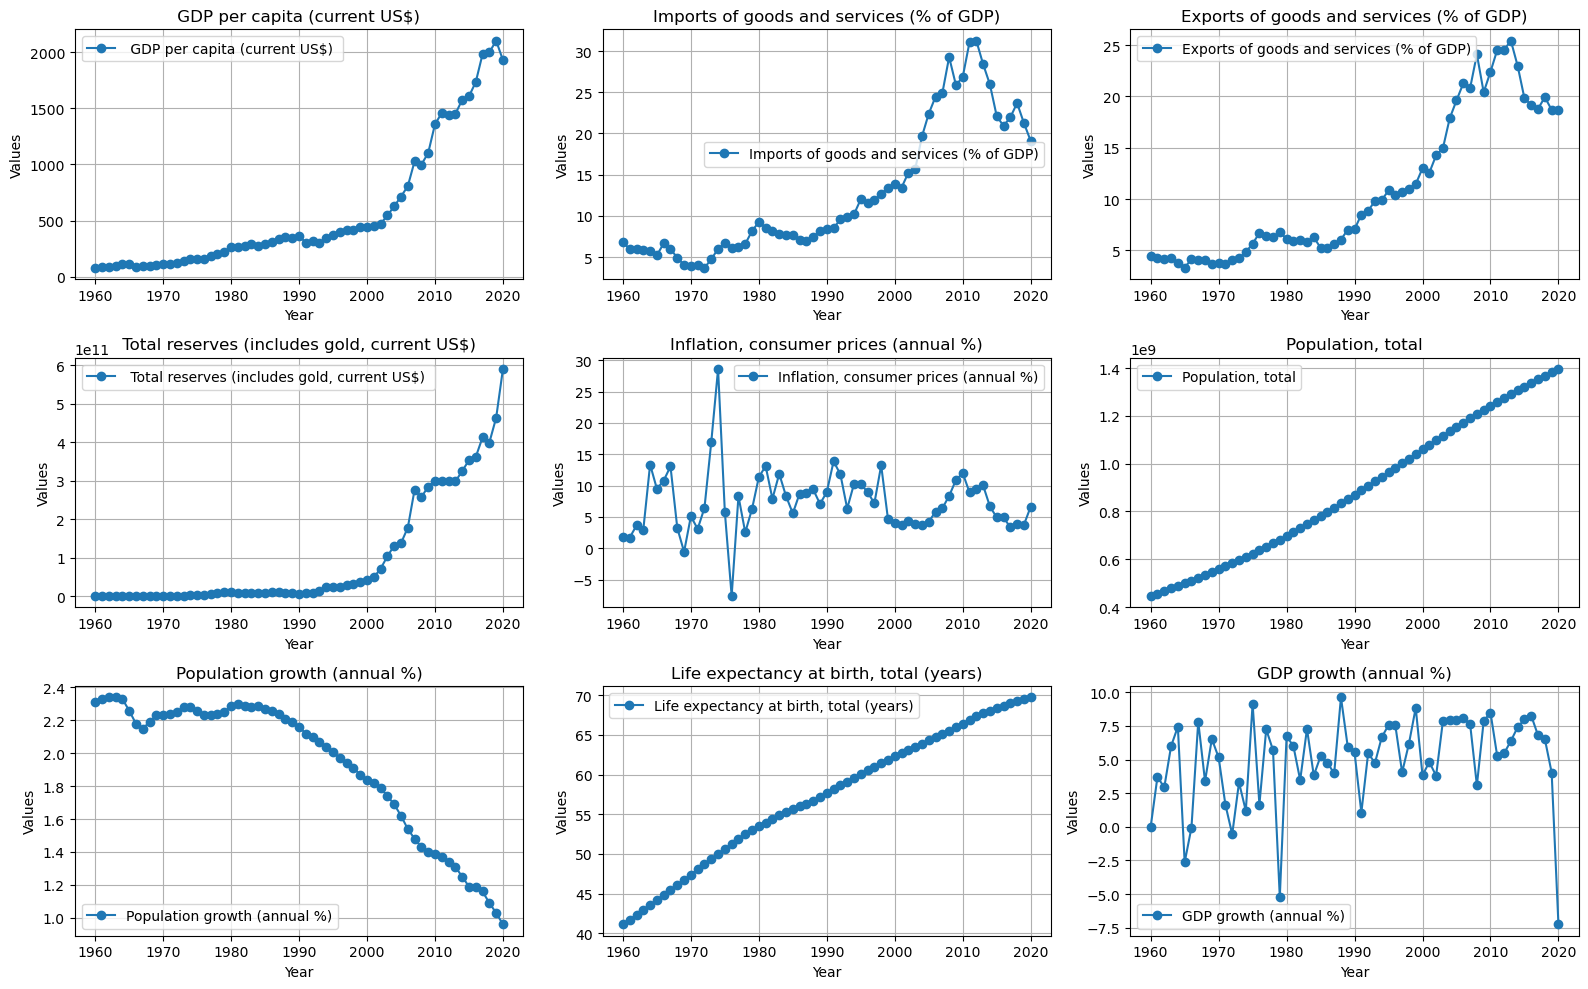

In [72]:
# Line Charts with all attributes and y-axis labels
plt.figure(figsize=(16, 10))

# Create a subplot with a specified number of rows and columns
num_rows = 3  # You can adjust the number of rows based on your preference
num_cols = 3  # You can adjust the number of columns based on your preference

# Iterate through features and create subplots
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(dataset['Year'], dataset[feature], label=feature, marker='o')
    plt.title(feature)
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


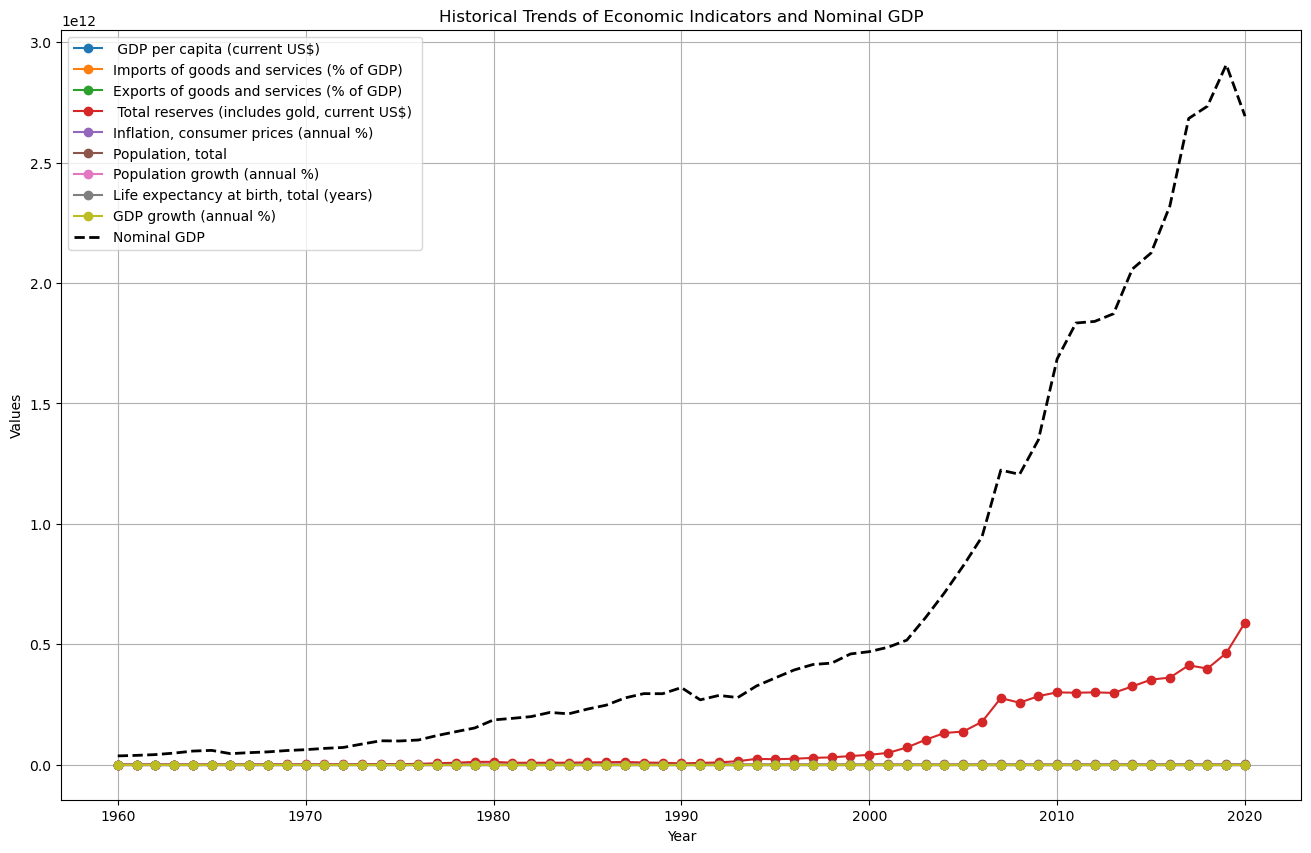

In [75]:
# Line Charts with all attributes, including Nominal GDP, in a single graph
plt.figure(figsize=(16, 10))

# Plot all features along with Nominal GDP
for i, feature in enumerate(features):
    plt.plot(dataset['Year'], dataset[feature], label=feature, marker='o')

# Plot Nominal GDP
plt.plot(dataset['Year'], dataset['Nominal GDP'], label='Nominal GDP', linestyle='--', color='black', linewidth=2)

plt.title('Historical Trends of Economic Indicators and Nominal GDP')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


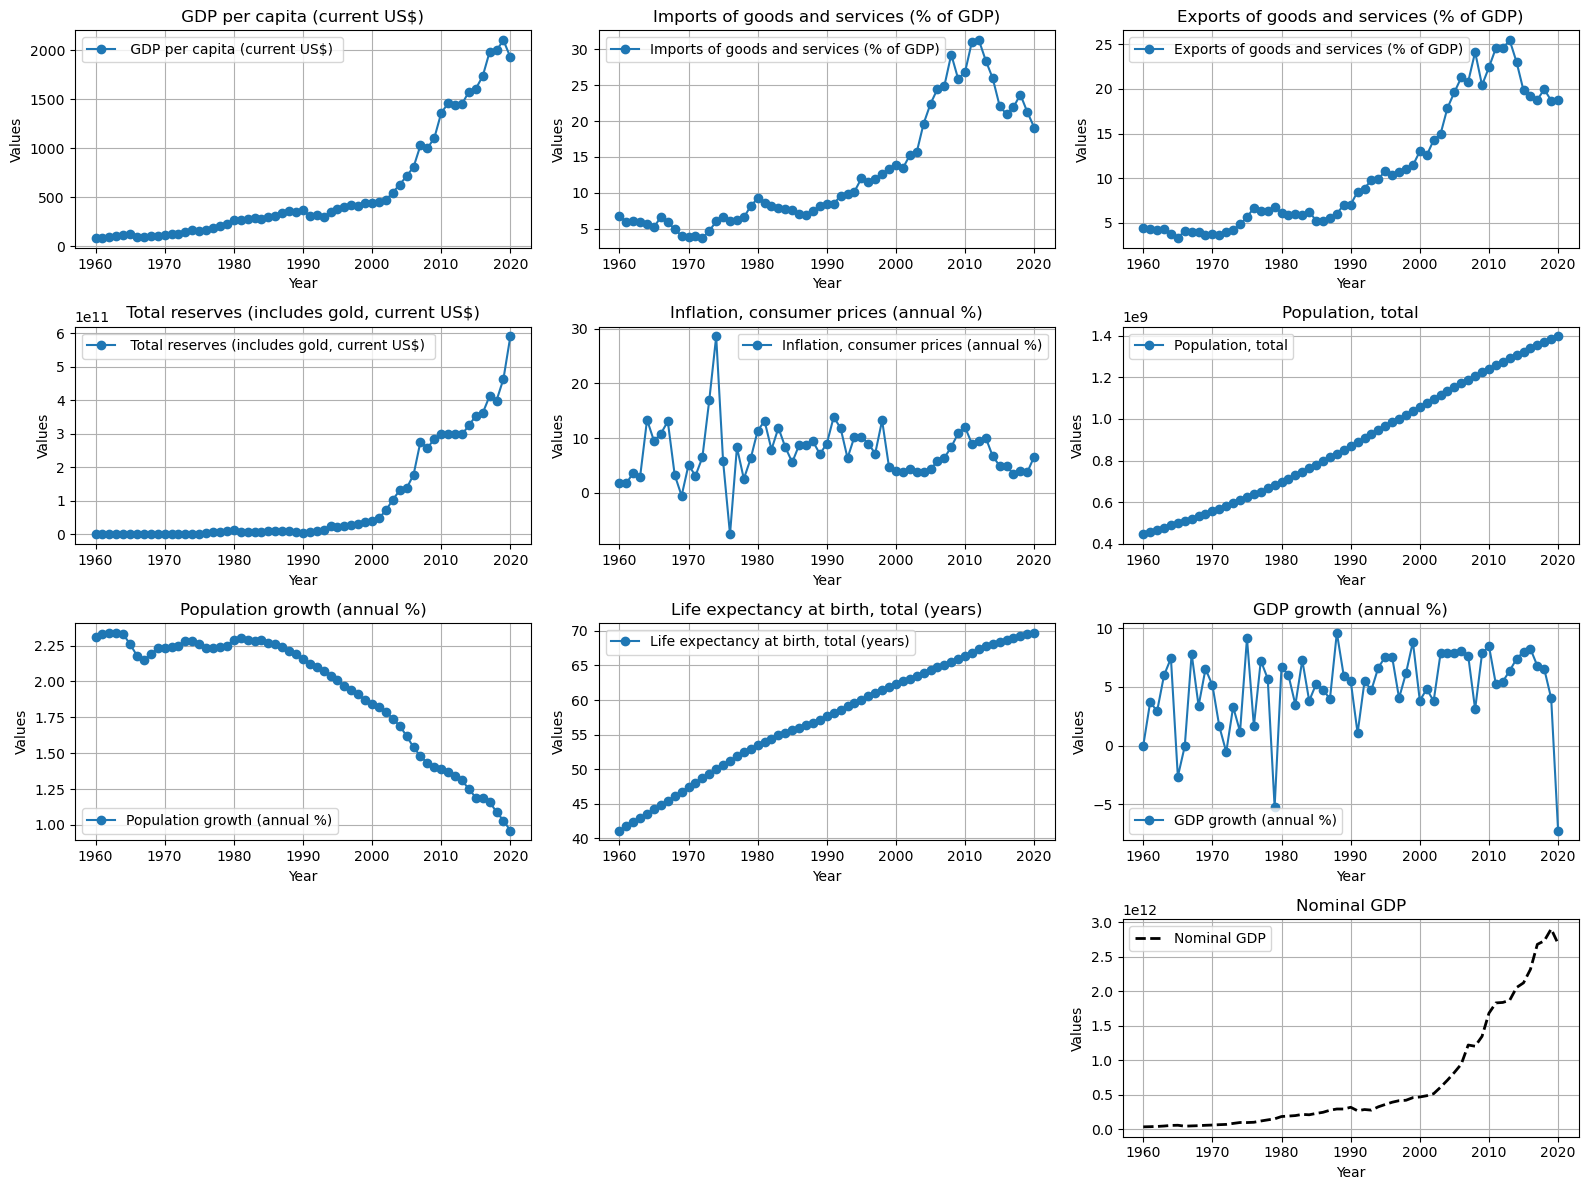

In [76]:
# Line Charts with all attributes and Nominal GDP in a 3x4 grid
plt.figure(figsize=(16, 12))

# Create a subplot with a specified number of rows and columns
num_rows = 4  # 3 rows for features and 1 row for Nominal GDP
num_cols = 3  # You can adjust the number of columns based on your preference

# Iterate through features and create subplots
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(dataset['Year'], dataset[feature], label=feature, marker='o')
    plt.title(feature)
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

# Plot Nominal GDP in the last row
plt.subplot(num_rows, num_cols, num_cols * num_rows)
plt.plot(dataset['Year'], dataset['Nominal GDP'], label='Nominal GDP', linestyle='--', color='black', linewidth=2)
plt.title('Nominal GDP')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
